**1) Importing important libraries and loading dataset**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Read the csv file

df=pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**2) Understanding the data**

In [16]:
# Check dimension's

print((df.count(),len(df.columns)))

(age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64, 17)


In [17]:
# Check for the schema

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [18]:
# Top 5 records

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
# Datatypes of the columns

df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [20]:
# Getting Statistical information

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [21]:
#Drop unwanted columns

my_data = df.drop(['contact', 'day','default'], axis=1)
my_data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [22]:
# Get the dimensions of the data

len(my_data.columns)

14

In [23]:
# Handling null values

my_data.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [24]:
# value counts of columns

print(my_data.value_counts('job'))
print()

print(my_data.value_counts('marital'))
print()

print(my_data.value_counts('education'))
print()

print(my_data.value_counts('loan'))
print()

print(my_data.value_counts('poutcome'))
print()

print(my_data.value_counts('deposit'))

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
dtype: int64

marital
married     6351
single      3518
divorced    1293
dtype: int64

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
dtype: int64

loan
no     9702
yes    1460
dtype: int64

poutcome
unknown    8326
failure    1228
success    1071
other       537
dtype: int64

deposit
no     5873
yes    5289
dtype: int64


In [25]:
obj = (my_data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


**3. Data Visualization**

<ipython-input-26-2a4531d52b38>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = my_data.corr()


<Axes: >

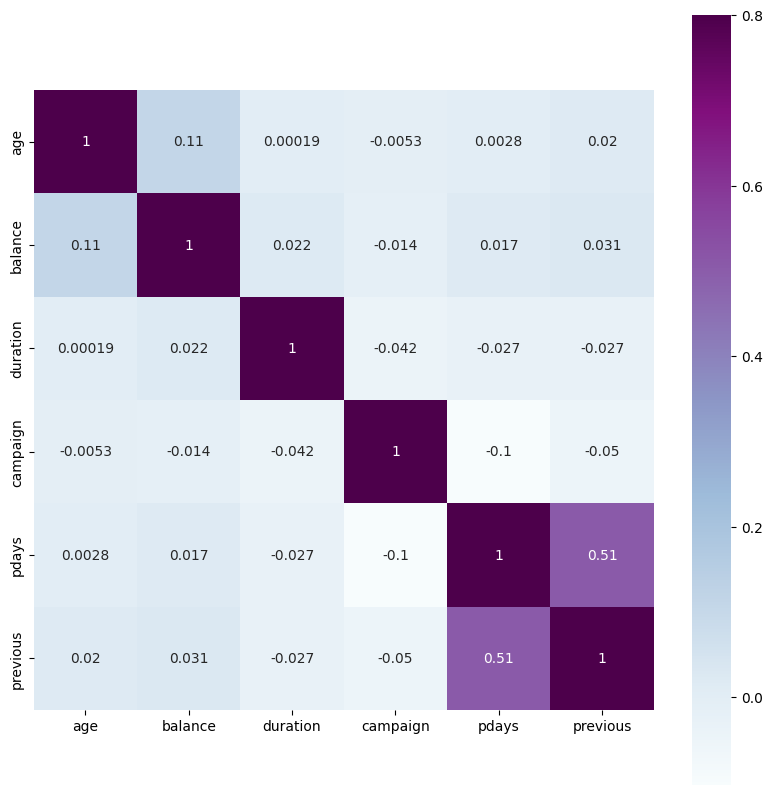

In [26]:
# Heat map

matrix = my_data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

<Figure size 1000x1000 with 0 Axes>

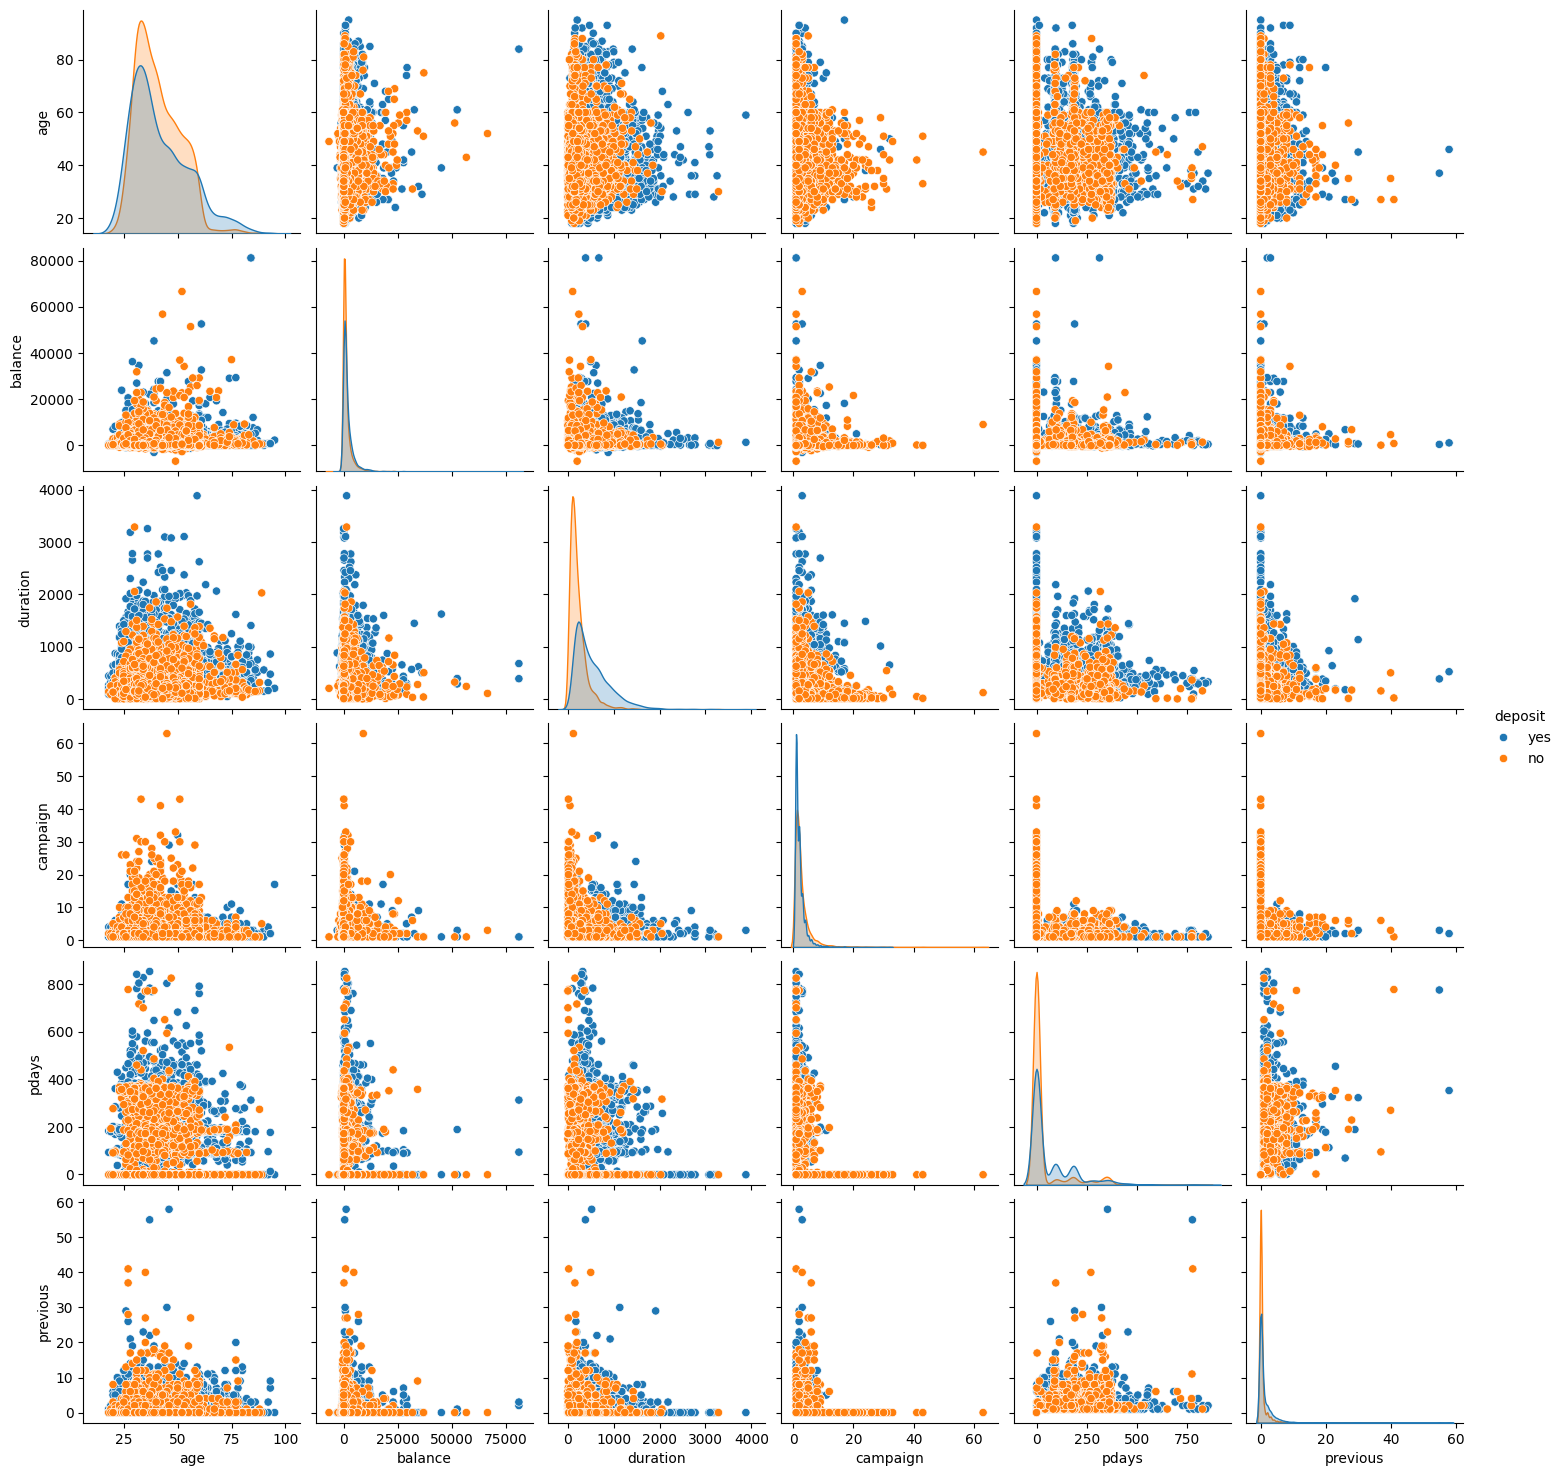

In [27]:
# Pairplot

plt.figure(figsize=(10,10))
sns.pairplot(my_data, hue='deposit')

<Axes: >

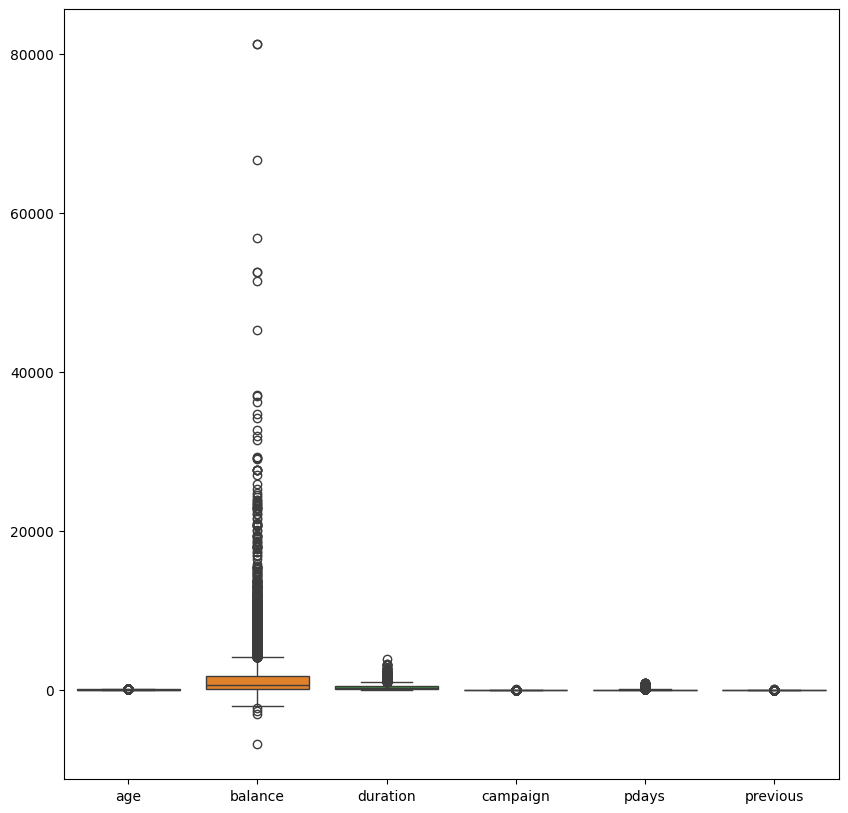

In [28]:
# Boxplot

plt.figure(figsize=(10,10))
sns.boxplot(my_data)

In [29]:
# Sunburst Chart

import plotly.express as px
fig = px.sunburst(my_data, path=['deposit', 'marital','housing','education'], values='balance')
fig.show()

In [30]:
# Replacing (admin.) with admin

my_data.replace(to_replace='admin.', value='admin', inplace=True)
my_data.head()

,age,job,marital,education,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,2343,yes,no,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,45,no,no,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,184,no,no,may,673,2,-1,0,unknown,yes


In [31]:
cat=my_data.select_dtypes('object').columns.tolist()
cat

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'month',
 'poutcome',
 'deposit']

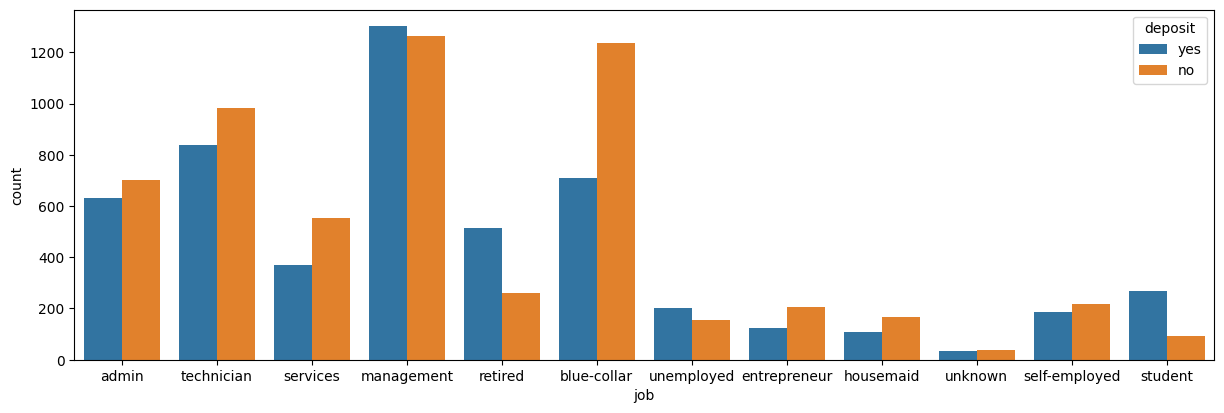

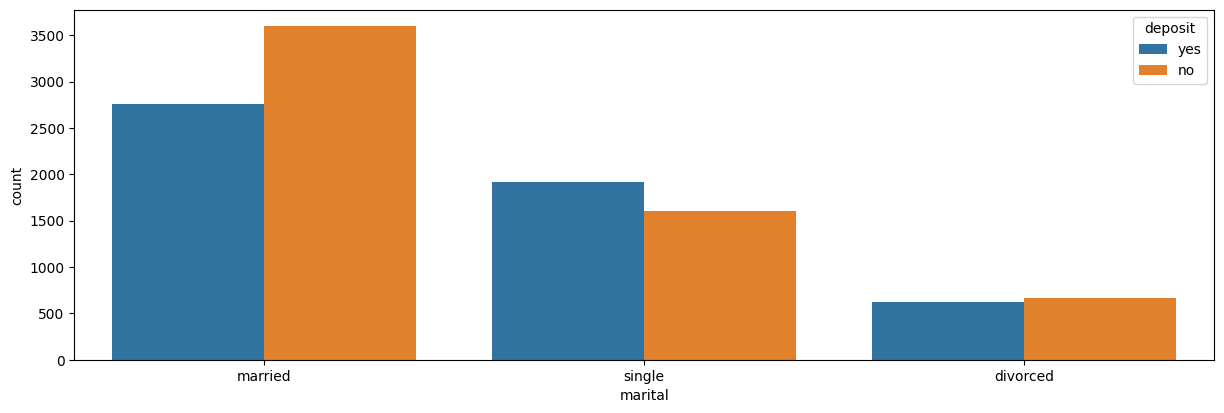

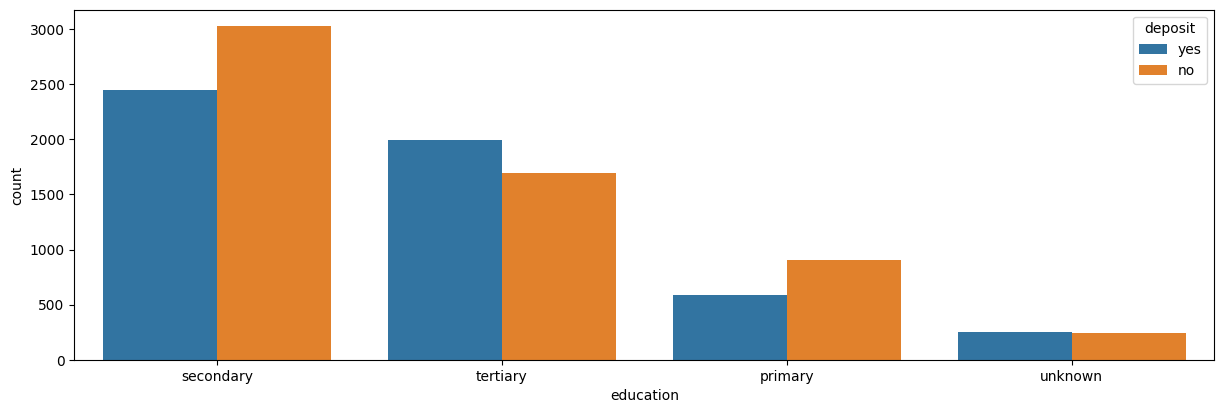

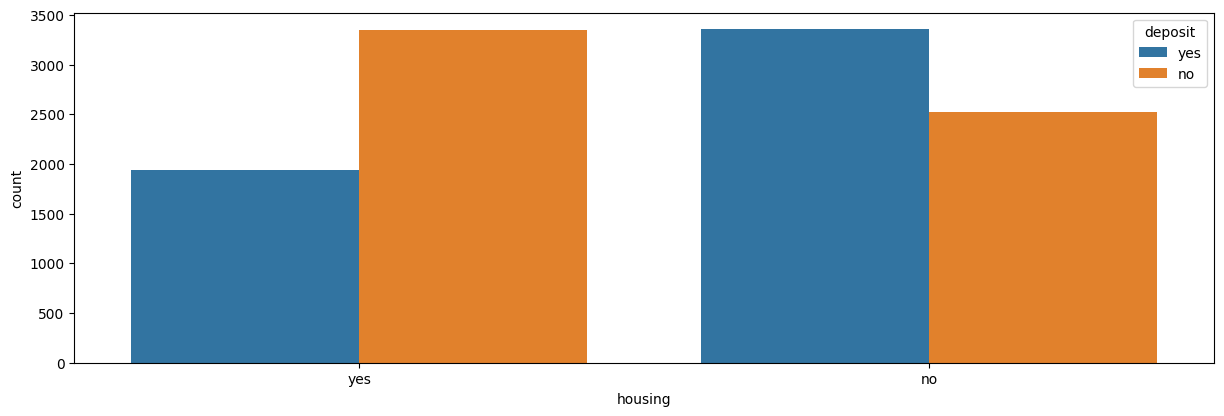

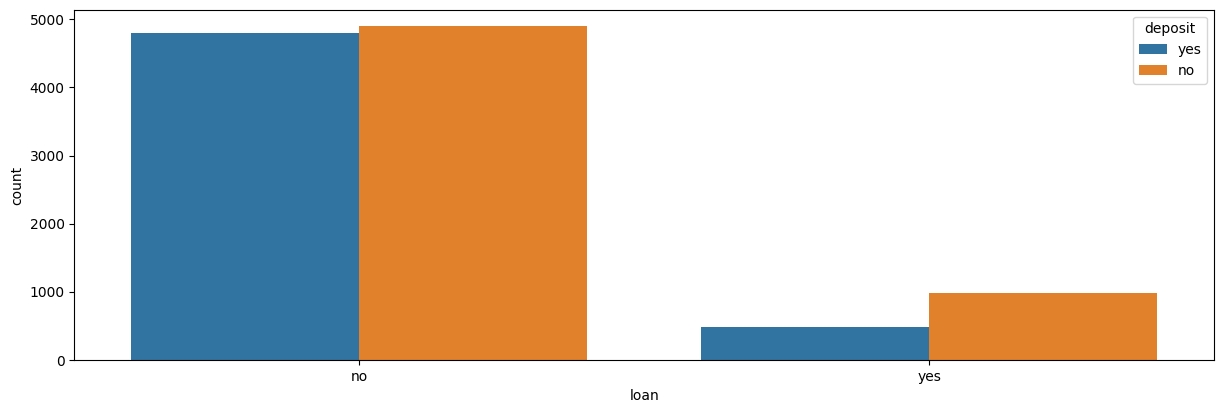

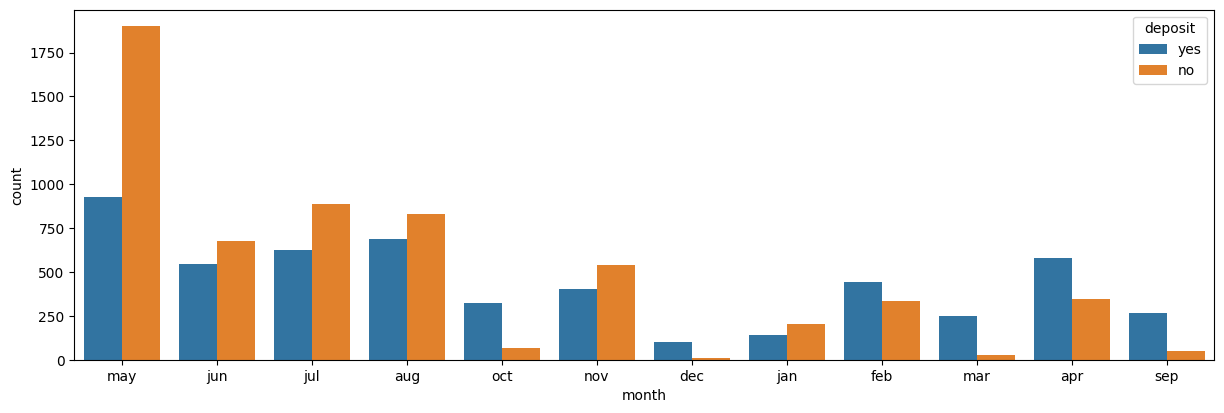

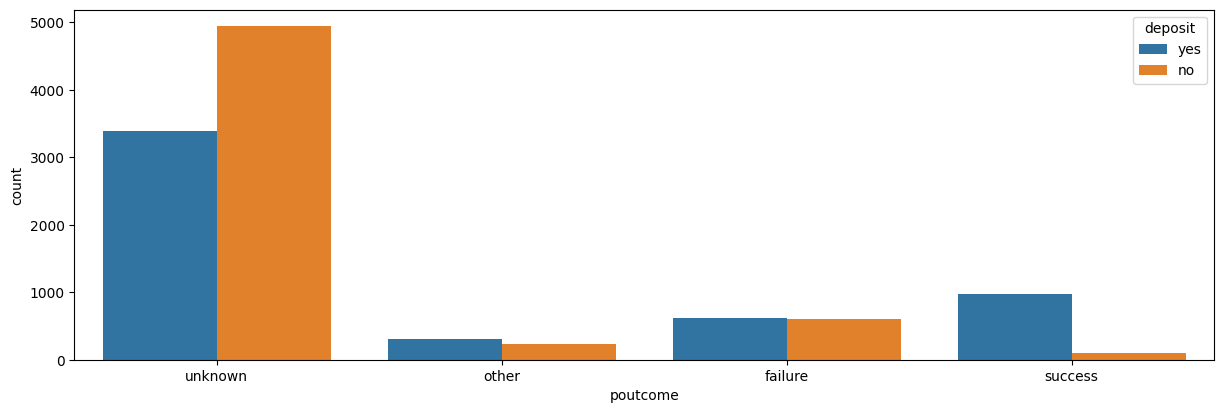

In [32]:
# Plotting categorical data

for i in cat[:-1]:
 plt.figure(figsize = (50,10))
 plt.subplot(2,3,3)
 sns.countplot(x =i, hue = 'deposit', data = my_data)

In [33]:
# Preprocessing steps:

# Import label encoder
from sklearn import preprocessing

# label_encoder : Converting categorical data into numerical using Label Encoder
label_encoder = preprocessing.LabelEncoder()
obj = (my_data.dtypes == 'object')
for col in list(obj[obj].index):
  my_data[col] = label_encoder.fit_transform(my_data[col])

In [34]:
# view the transformed data
my_data.head(10)

,age,job,marital,education,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,8,1042,1,-1,0,3,1
1,56,0,1,1,45,0,0,8,1467,1,-1,0,3,1
2,41,9,1,1,1270,1,0,8,1389,1,-1,0,3,1
3,55,7,1,1,2476,1,0,8,579,1,-1,0,3,1
4,54,0,1,2,184,0,0,8,673,2,-1,0,3,1
5,42,4,2,2,0,1,1,8,562,2,-1,0,3,1
6,56,4,1,2,830,1,1,8,1201,1,-1,0,3,1
7,60,5,0,1,545,1,0,8,1030,1,-1,0,3,1
8,37,9,1,1,1,1,0,8,608,1,-1,0,3,1
9,28,7,2,1,5090,1,0,8,1297,3,-1,0,3,1


In [35]:
for col in list(obj[obj].index):
  print(f"{col}: {my_data[col].unique()}")

job: [ 0  9  7  4  5  1 10  2  3 11  6  8]
marital: [1 2 0]
education: [1 2 0 3]
housing: [1 0]
loan: [0 1]
month: [ 8  6  5  1 10  9  2  4  3  7  0 11]
poutcome: [3 1 0 2]
deposit: [1 0]


0    5873
1    5289
Name: deposit, dtype: int64

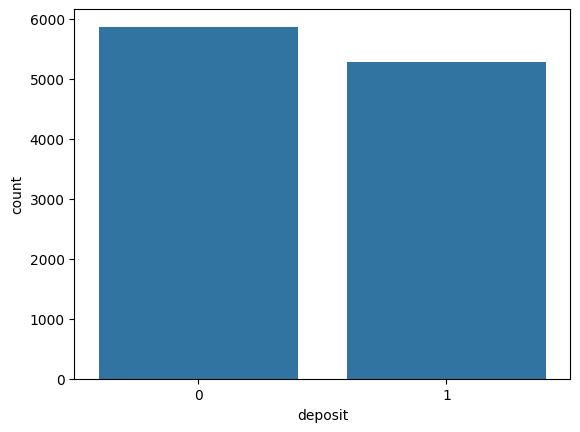

In [36]:
# Count Plot

sns.countplot(x='deposit',data=my_data)
my_data['deposit'].value_counts()

In [37]:
filename = 'mydata.csv'
my_data.to_csv('/content/' + filename, index=False)